In [1]:
#library(zoo)
library(glue)
library(dplyr)
#library(rstan)
library(tidyr)
library(ggplot2)
#library(ggrepel)
library(ggthemes)
library(lubridate)
library(tidyverse)
#library(flexdashboard)
library(futile.logger)

# load code from other files in this package
source("globals.R")


Attaching package: ‘dplyr’


The following object is masked from ‘package:glue’:

    collapse


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ tibble  3.0.6     ✔ purrr   0.3.4
✔ readr   1.3.1     ✔ stringr 1.4.0
✔ tibble  3.0.6     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ dplyr::collapse()        masks glue::collapse()
✖ lubridate::date()        masks base::date()
✖ dplyr::filter()          masks stats::filter()
✖ lubridate::intersect()   masks base:

In [2]:
install.packages("flexdashboard")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
df <- read_csv(file.path(RAW_DATA_DIR, "exercise_dates.csv")) %>%
  select(date, Amit) %>%
  mutate(date=ymd(date))

df$week <- cut(as.Date(df$date), "week")
head(df)

Parsed with column specification:
cols(
  date = col_character(),
  Amit = col_double(),
  Nidhi = col_double()
)



date,Amit,week
<date>,<dbl>,<fct>
2021-06-13,1,2021-06-07
2021-06-10,1,2021-06-07
2021-06-09,1,2021-06-07
2021-06-08,1,2021-06-07
2021-06-07,1,2021-06-07
2021-06-05,1,2021-05-31


In [4]:
df_workouts_per_week <- df %>%
  arrange(date) %>%
  count(week)

head(df_workouts_per_week)

week,n
<fct>,<int>
2020-01-06,1
2020-01-13,1
2020-01-20,2
2020-01-27,2
2020-02-03,2
2020-02-10,2


In [5]:
df_5_days_a_week <- df_workouts_per_week %>%
  mutate(week=ymd(week)) %>%
  filter(n==5)
max(df_5_days_a_week$week)

[1] "2021-06-07"

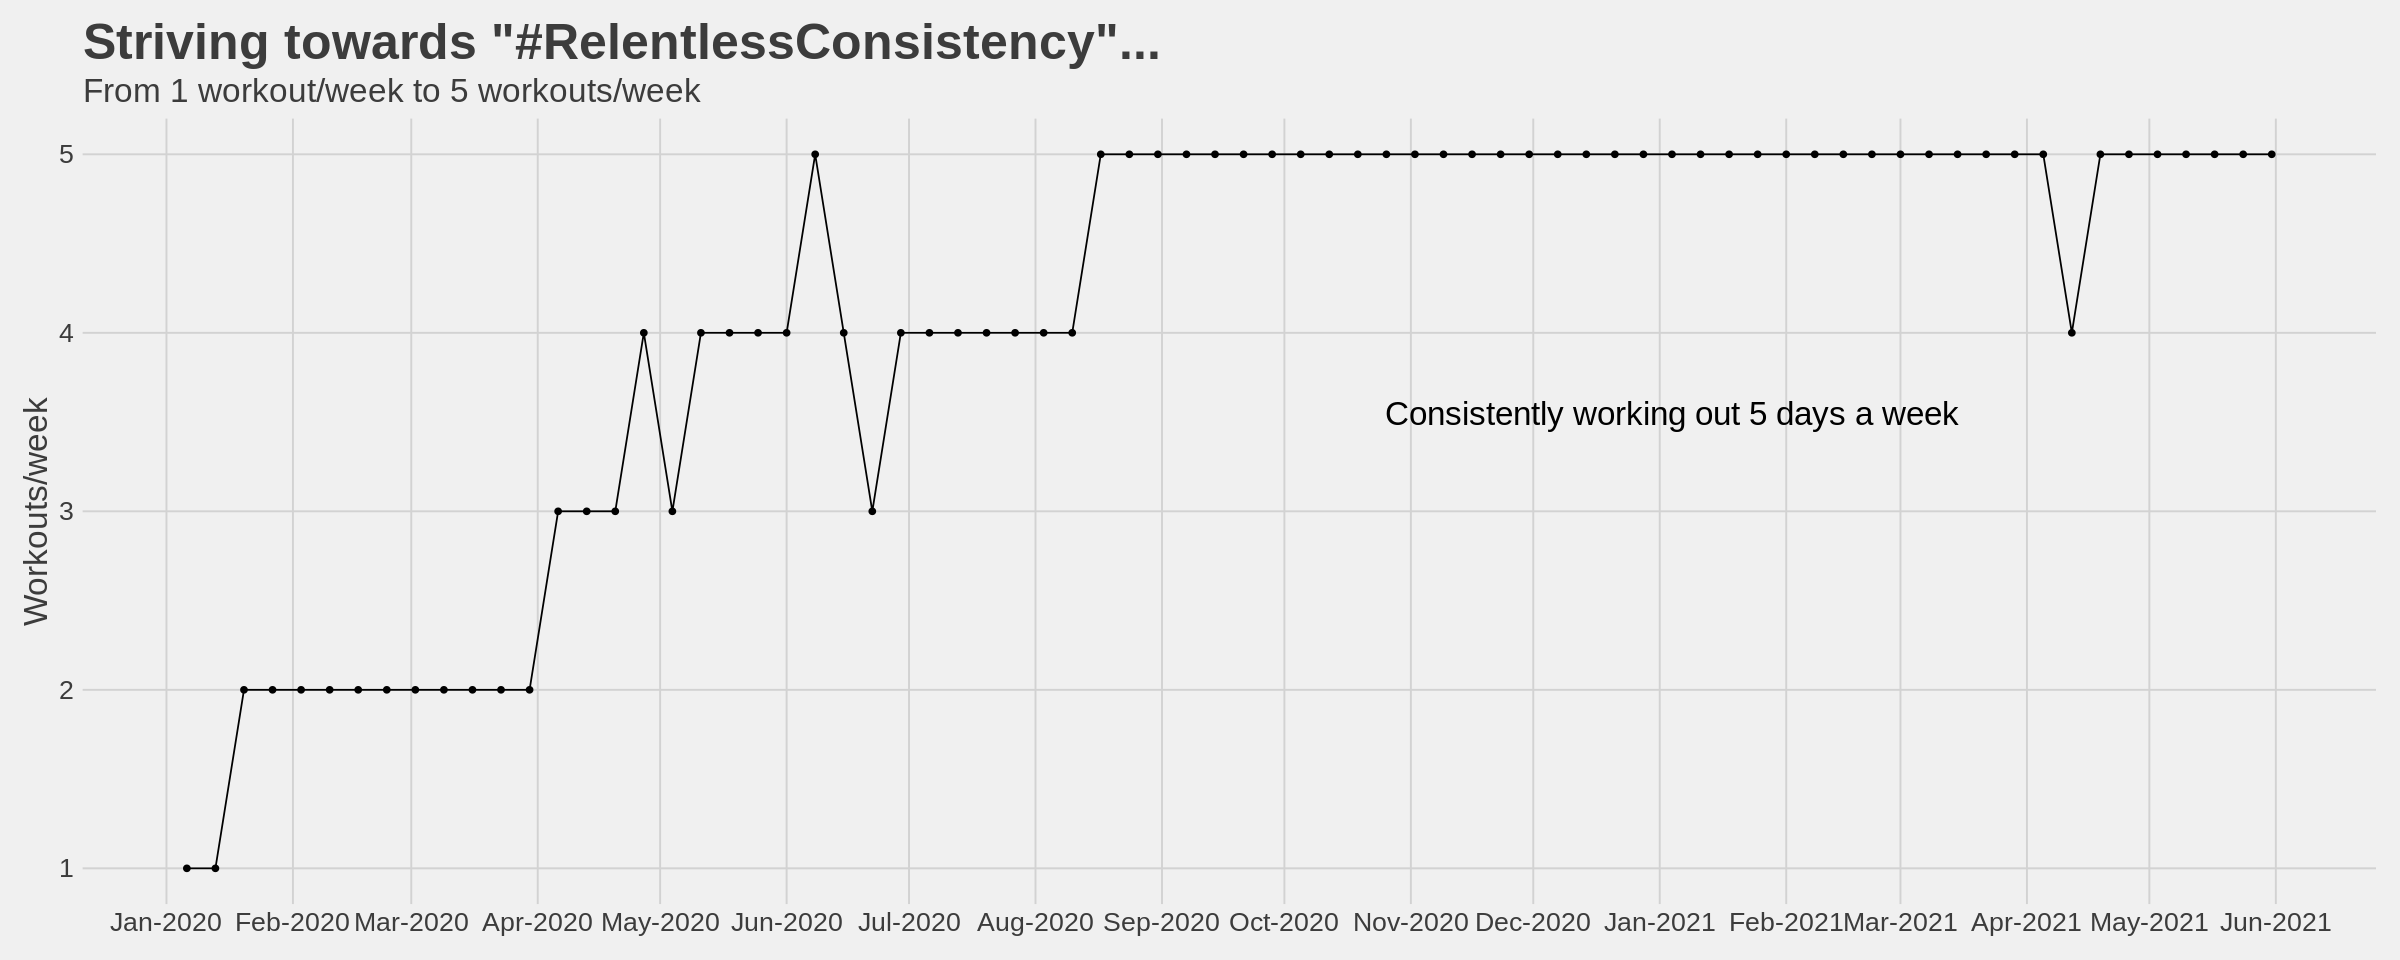

In [33]:
options(repr.plot.width=20, repr.plot.height=8)
df_5_days_a_week <- df_workouts_per_week %>%
  mutate(week=ymd(week)) %>%
  filter(n==5)
title <- "Striving towards \"#RelentlessConsistency\"..."
subtitle <- "From 1 workout/week to 5 workouts/week"
p <- df_workouts_per_week %>%
  filter(ymd(week) != max(ymd(week))) %>%
  ggplot(aes(x=ymd(week), y=n)) +
  geom_point() + 
  geom_line() +
  annotate("text", x=min(df_5_days_a_week$week)+210, y=3.55, label="Consistently working out 5 days a week", size=7) +  
  #geom_smooth("loess") +
  scale_y_continuous(breaks=seq(1,6,1)) +
  scale_x_date(date_breaks = "1 month", date_labels="%b-%Y") +
  theme_fivethirtyeight() + 
  labs(title=title,
       subtitle=subtitle) +
  theme(legend.position="none") +
  theme(axis.title = element_text(), axis.title.x = element_blank(), text = element_text(size=20)) + 
  ylab('Workouts/week')
p

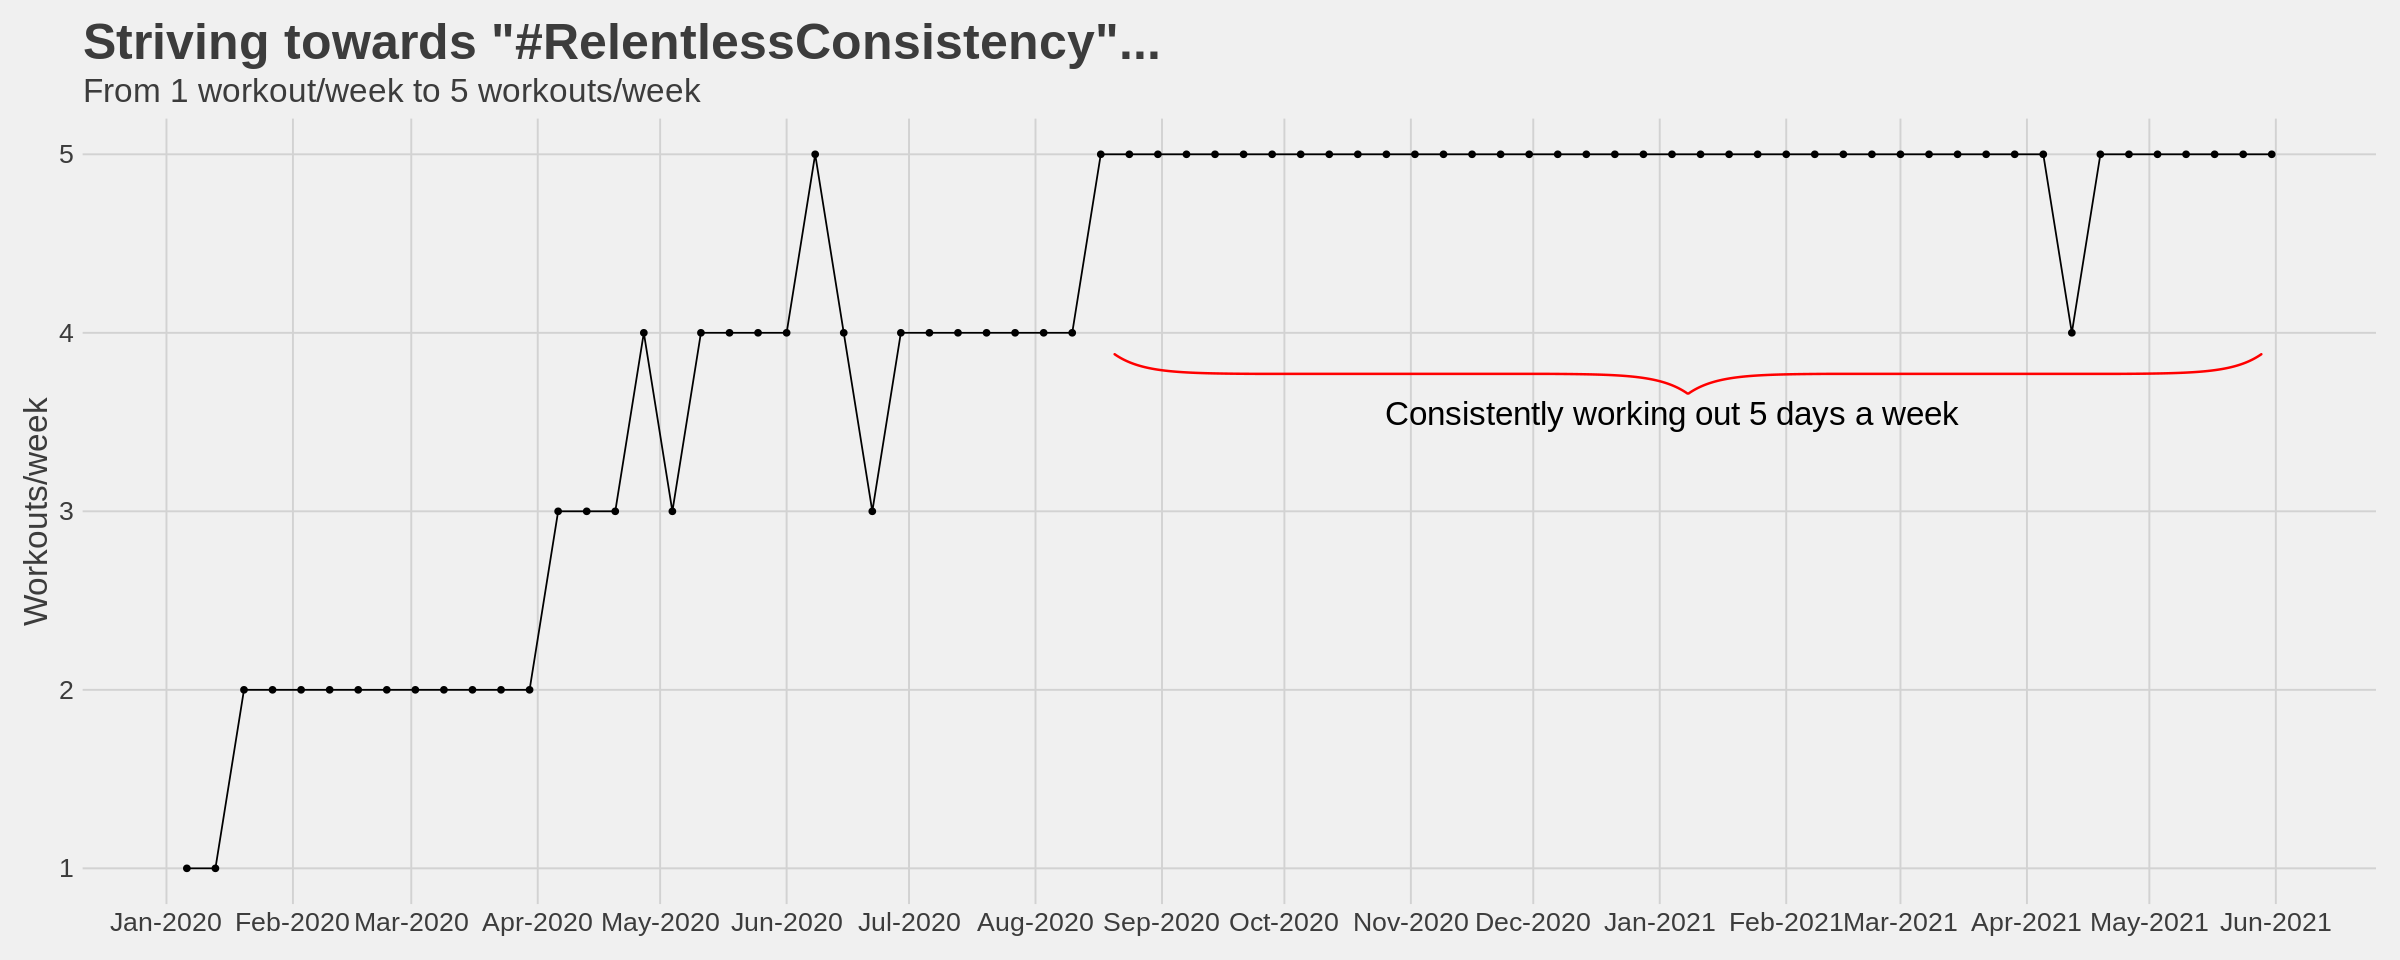

In [34]:
library(grid)
library(pBrackets) 
bracketsGrob <- function(...){
l <- list(...)
e <- new.env()
e$l <- l
  grid:::recordGrob(  {
    do.call(grid.brackets, l)
  }, e)
}

# note that units here are "npc", the only unit (besides physical units) that makes sense
# when annotating the plot panel in ggplot2 (since we have no access to 
# native units)

b1 <- bracketsGrob(0.33, 0.05, 0, 0.05, h=0.05, lwd=2, col="red")
b1 <- bracketsGrob(x2=0.45, y2=0.70, x1=0.95, y1=0.70, h=0.05, lwd=2, col="red")

p2 <- p + 
  annotation_custom(b1)
p2

In [8]:
df_wt <- read_csv(file.path("data", "Amit.csv"))
head(df_wt)

Parsed with column specification:
cols(
  Date = col_character(),
  Weight = col_character(),
  BMI = col_character(),
  `Body Fat` = col_character(),
  `Lean Mass` = col_character(),
  `Muscle Percentage` = col_character(),
  `Water Percentage` = col_character()
)



Date,Weight,BMI,Body Fat,Lean Mass,Muscle Percentage,Water Percentage
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2021/06/12,190.26,28.8,27.2,138.51,39.1,53.1
2021/06/11,190.7,28.9,27.4,138.45,39.0,53.0
2021/06/10,190.92,28.9,27.4,138.61,39.0,53.0
2021/06/09,191.8,29.1,27.6,138.86,39.0,52.9
2021/06/08,190.92,28.9,27.4,138.61,39.0,53.0
2021/06/07,193.34,29.3,27.8,139.59,38.8,52.7


In [9]:
df_wt2 <- df_wt %>%
  select(Date, Weight) %>%
  mutate(Weight = as.integer(Weight/10)*10) %>%
  count(Weight) %>%
  mutate(Weight = glue("{Weight}s ({n} days)"))
df_wt2

ERROR: Error: Problem with `mutate()` input `Weight`.
[31m✖[39m non-numeric argument to binary operator
[34mℹ[39m Input `Weight` is `as.integer(Weight/10) * 10`.


In [ ]:
library(waffle)
library(ggtext)
text_col <- "#d0cfcd"
light_col <- "#fff1af"
dark_col <- "#585350"
title_col <- "#fc8431"
text_col <- "#d0cfcd"
bg_col <- "#0d101f"
p2_days_counts_as_list <- unlist(df_wt2$n)
names(p2_days_counts_as_list) <- df_wt2$Weight
title <- glue("Journey to losing 61lb in {sum(p2_days_counts_as_list)} days, from {as.integer(max(df_wt$Weight))}lb to {as.integer(min(df_wt$Weight))}lb")
subtitle <- glue("1 box = 1 day")
waffle(
  p2_days_counts_as_list, rows=10, size = 0.5, legend_pos = "bottom",
  #colors = c("#c7d4b6", "#a3aabd", "#a0d0de"),
  title = glue("{title}\n{subtitle}")) + 
theme(text = element_text(size=28)) +
theme(plot.title = element_text(size=28, family="Helvetica Bold")) +
guides(fill = guide_legend(nrow = 1)) +
  ggthemes::scale_fill_tableau(name=NULL) 